# Naive Bayes Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [17]:
def estimate_gaussian(X):
    n = X.shape[1]
    mu = np.mean(X, axis=0)
    sigma = np.var(X, axis=0)
    return mu, sigma


def gauss(x, mu, sigma):
    res = 1. / (np.sqrt(2 * np.pi * sigma)) *  np.exp(-0.5 *((x-mu)**2) / sigma )
        
    return res


def nb(X, y):
    phi = np.mean(y)
    mu1, sigma1 = estimate_gaussian(X[np.where(y==1)[0]])
    mu2, sigma2 = estimate_gaussian(X[np.where(y==0)[0]])
    return phi, mu1, mu2, sigma1, sigma2


def predict(x, phi, mu1, mu2, sigma1, sigma2):
    p1 = phi
    p2 = 1 - phi
    for i in range(len(x)):
        p1 *= gauss(x[i], mu1[i], sigma1[i])
        p2 *= gauss(x[i], mu2[i], sigma2[i])
    if p1 > p2:
        target = 1
    else:
        target = 0
    return target

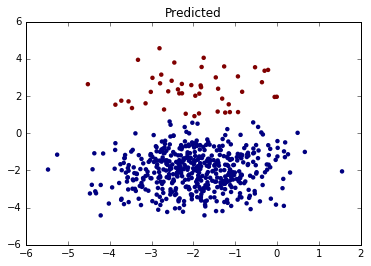

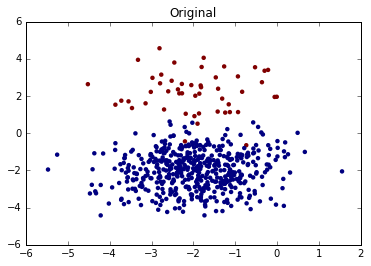

In [24]:
N1 = 50
N2 = 500
X1 = np.random.randn(N1,2) + np.array([-2,2])
X2 = np.random.randn(N2,2) + np.array([-2,-2])
Y = np.concatenate([np.ones(N1),np.zeros(N2)])[:,None]
X = np.vstack([X1,X2])

phi, mu1, mu2, sigma1, sigma2 = nb(X,Y)
y_pred = []
for x in X:
    y_pred.append(predict(x, phi, mu1, mu2, sigma1, sigma2))
plt.scatter(X[:,0],X[:,1], c = y_pred, edgecolors= 'none')
plt.title('Predicted')
plt.show()
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')
plt.title('Original')
plt.show()